In [123]:
import random
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from pandas import Timestamp
from datetime import datetime
from time import time
from os import getcwd
from os.path import join
start = time()
path = join(getcwd().rstrip('src'), 'data/owid-covid-data.csv').replace('\\', '/')
print(path)
data = pd.read_csv(path)
end = time()
print('Reading time: ' + str(end-start))

D:/Note_Database/Subject/BD_ML Big Data and Machine Learning/BD_ML_Code/data/owid-covid-data.csv
Reading time: 1.2166731357574463


# Q1
Which country reaches 200% administrated vaccination first?

In [124]:
a = data[data.total_vaccinations_per_hundred > 100][['location', 'date', 'total_vaccinations_per_hundred']]
min_vac = float(200)
date_temp = []
loc_temp = []
for index, row in a.iterrows():
    if row['total_vaccinations_per_hundred']>=min_vac:
        date_temp.append(row['date'])
        loc_temp.append(row['location'])
        #         print(row['location'])
#         print(row['total_vaccinations_per_hundred'])
min_date = min(date_temp)
min_date_index = date_temp.index(min_date)
print(loc_temp[min_date_index])


Gibraltar


1. [ ] Spain
2. [ ] Italy
3. [x] Gibraltar
4. [ ] Israel
5. [ ] United Kingdom
6. [ ] United States

### Answer: C

# Q2
Which of the following numbers is mostly close to the vaccination rate per population by the end of 2021? Example: If everyone gets 2 shots, then the vaccinatino rate is 200%

In [125]:
vac_data = data[data.date < ("2022-01-01") ][['location', 'date', 'total_vaccinations_per_hundred']]
vac_data = vac_data[vac_data.location == "World"]
vac_data.tail()
# 116.04


,location,date,total_vaccinations_per_hundred
215941,World,2021-12-27,114.04
215942,World,2021-12-28,114.63
215943,World,2021-12-29,115.13
215944,World,2021-12-30,115.61
215945,World,2021-12-31,116.04


1. [ ] 50%
2. [x] 100%
3. [ ] 150%
4. [ ] 200%
5. [ ] 250%

### Answer: B

# Q3
Which of the following numbers is mostly close to the cumulative COVID deaths by the end of 2021 in the world?

In [1]:
death_data = data[data.date < ("2022-01-01") ][['location', 'date', 'total_deaths']]
death_data = death_data[death_data.location == "World"]
death_data.tail()
# 5469011 => 5M


NameError: name 'data' is not defined

1. [ ] 1M
2. [ ] 3M
3. [x] 5M
4. [ ] 7M
5. [ ] 9M

### Answer: C
DF[(DF.location == 'World') & (DF.date == '2021-12-31')]

# Q4
Which country has the highest COVID-19 deaths per population in 2021?

In [128]:
death_data = data[data.date < ("2022-01-01") ][['continent', 'location', 'date', 'total_deaths']]

buf = [None, None]
location = []

for index, row in data.iterrows():
    buf.append(row['location'])
    if buf[-1] != buf[-2]:
        if pd.isnull(row['continent']):
            continue
        else:
            location.append(row['location'])

death_temp = pd.DataFrame()
for x in location:
    temp_data = (death_data.loc[death_data['location']==x]).tail(i)
#     while True:
#         i = 1
#         temp_data = (death_data.loc[death_data['location']==x]).tail(i)
#         value = temp_data.total_deaths.values[0] 
#         if math.isnan(value):
#             i += 1
#         else:
#             break
    death_temp = pd.concat([death_temp, temp_data])
death_temp.sort_values(by=['total_deaths'], ascending=False).head()


,continent,location,date,total_deaths
207098,North America,United States,2021-12-31,825605.0
27866,South America,Brazil,2021-12-31,619334.0
90624,Asia,India,2021-12-31,481486.0
163251,Europe,Russia,2021-12-31,302671.0
127253,North America,Mexico,2021-12-31,299428.0


1. [ ] Peru
2. [ ] Hungary
3. [ ] Bulgaria
4. [x] United States
5. [ ] Itally
6. [ ] Brazil

### Answer: C

# Q5
Based on your knowledge, which of these countries might have some deaths over the time like the attached chart.

![Death trend over time](img/1.png)

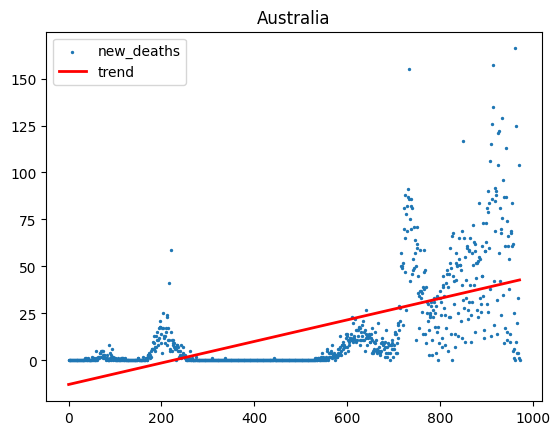

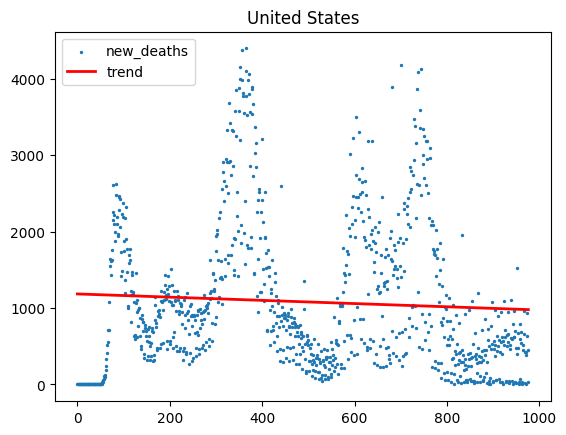

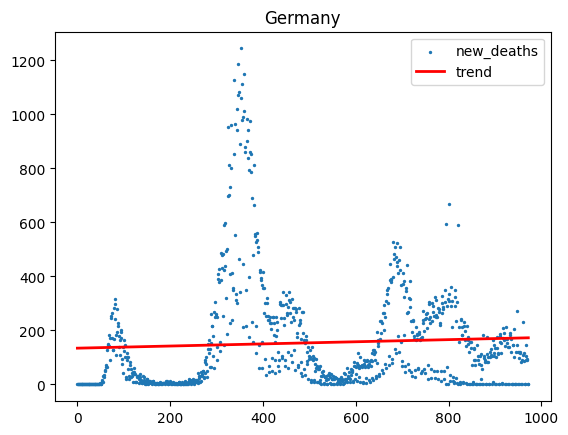

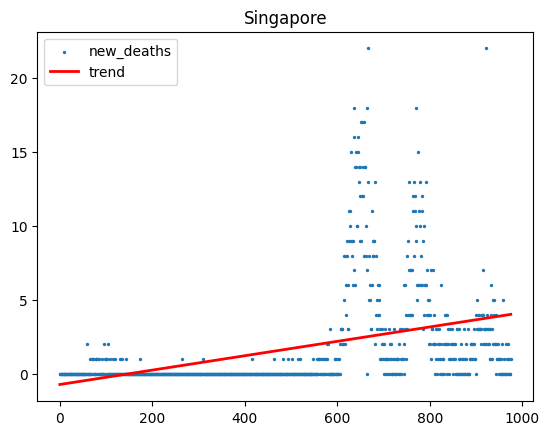

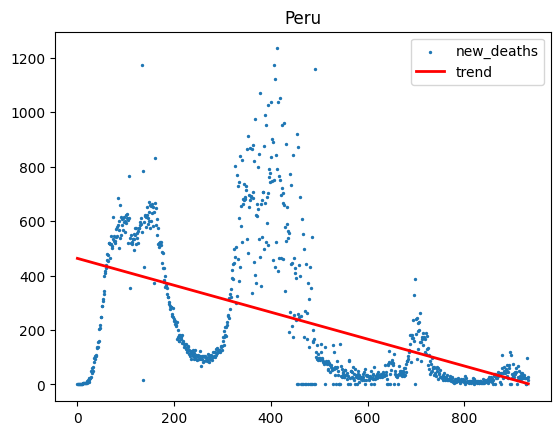

In [129]:
loc = ['Australia', 'United States', 'Germany', 'Singapore', 'Peru']

for con in loc:
    temp = data[data.location==con][['new_deaths', 'date']]
    temp['new_deaths'] = temp['new_deaths'].fillna(0)
    y = list(temp.new_deaths)
    x = np.arange(0, len(y),1)
    plt.figure()
    plt.title(con)
    plt.scatter(x, y, label='new_deaths', s=2)
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x), 'r-', label='trend', linewidth=2)
    plt.legend()

1. [x] Australia
2. [ ] United States
3. [x] Germany
4. [x] Singapore
5. [ ] Peru

### Answer: BC
The death rate in winter tends to be higher in most of the countries.  This graph shows that it is higher at the end and the beginning of every year which is the winter time in north hemisphere.  Therefore, the answer is United States and Germany.

# Q6
Which of the following factors increase the death rate of Taiwan in June, 2021?
- High dark numbers, low confirmed cases, high senior population, low vaccination rate, low test rate

![Death trend over time](img/2.png)

1. [ ] high dark numbers
2. [ ] low confirmed cases
3. [x] high senior population
4. [ ] low vaccination rate
5. [ ] low test rate

### Answer: BC

# Q7
Which continent has the highest death rate?

![Alt test](img/3.png)

In [ ]:
# Europe has most dot at the top section

1. [ ] Africa
2. [ ] Asia
3. [ ] North America
4. [ ] South America
5. [x] Europe
6. [ ] Oceania

### Answer: E

# Q8
Which 3 continents have the highest potential of having largest dark number?

![Alt test](img/4.png)

In [ ]:
# Africa, South America, Oceania has low test count and high positive rate


1. [x] Africa
2. [ ] Asia
3. [ ] North America
4. [x] South America
5. [ ] Europe
6. [x] Oceania

### Answer: ABC